## Analysis of ARCOS DEA Database - Vermont Data

This dataset comes from the *Washington Post*'s cleaned version of opioid transactions from 2006 to 2012 from the ARCOS database, a DEA system designed to monitor sales and purchases of controlled substances. [Downloads are available here](https://www.washingtonpost.com/graphics/2019/investigations/dea-pain-pill-database/). They've compiled some [caveats and information about the dataset here](https://www.washingtonpost.com/national/2019/07/18/how-download-use-dea-pain-pills-database/). You can find additional information on data entry and field definitions in [this 1997 ARCOS handbook](https://www.deadiversion.usdoj.gov/arcos/handbook/full.pdf), which also includes some very helpful pointers on loading files onto magnetic diskettes.

Information on controlled substance transactions is entered by a **reporter**, which is typically a distributor or manufacturer. The **reporter** must catalog information on the **buyer** and the **product** — specifically, quantity and type of substance. The *Washington Post* did not include data on opioids other than hydrocodone and oxycodone, as those are both the bulk of opioids sold during that period and also the ones that were most commonly diverted.

This file contains the analysis for the *Seven Days* story "[Data Dive: As Opioid Crisis Ramped Up, Pills Flowed Into Vermont by the Millions](https://www.sevendaysvt.com/OffMessage/archives/2019/07/19/data-dive-as-opioid-crisis-ramped-up-pills-flowed-into-vermont-by-the-millions)", published on July 19, 2019.

In [1]:
import pandas as pd

# Set custom formats for displaying really big dataframes with really long numbers
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format

import altair as alt

Now, let's load in the data.

In [2]:
arcosvt_full = pd.read_csv("raw_data/arcos-vt-statewide-itemized.tsv", sep='\t')

# drop some unnecessary columns
arcosvt_full=arcosvt_full.drop(["REPORTER_DEA_NO","REPORTER_ADDRESS2","BUYER_DEA_NO","NDC_NO","ORDER_FORM_NO","TRANSACTION_ID"],axis=1)

arcosvt_full["TRANSACTION_DATE"] = pd.to_datetime(arcosvt_full["TRANSACTION_DATE"], format='%m%d%Y')
arcosvt_full["YEAR"] = (arcosvt_full["TRANSACTION_DATE"].dt.year).astype("str")

# create a working dataset without HealthDirect outlier
arcosvt = arcosvt_full[~arcosvt_full["BUYER_NAME"].str.startswith("HEALTHDIRECT INSTITUTIONAL")]

# create a HealthDirect frame so we can look at those purchases independently
healthdirect = arcosvt_full[arcosvt_full["BUYER_NAME"].str.startswith("HEALTHDIRECT INSTITUTIONAL")]

arcosvt.head()

,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,BUYER_BUS_ACT,BUYER_NAME,BUYER_ADDL_CO_INFO,BUYER_ADDRESS1,BUYER_ADDRESS2,BUYER_CITY,BUYER_STATE,BUYER_ZIP,BUYER_COUNTY,TRANSACTION_CODE,DRUG_CODE,DRUG_NAME,QUANTITY,UNIT,ACTION_INDICATOR,CORRECTION_NO,STRENGTH,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str,YEAR
0,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,GOUVERNEUR,NY,13642,SAINT LAWRENCE,RETAIL PHARMACY,HEALTH AID INC,DBA JOHNSON PHARMACY,117 LOWER MAIN WEST,PO BOX 602,JOHNSON,VT,5656,LAMOILLE,S,9193,HYDROCODONE,1.00,nan,NaN,nan,0.00,2006-03-09,0.45,100.00,HYDROCODONE BIT. 7.5MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.00,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",7.50,2006
1,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,GOUVERNEUR,NY,13642,SAINT LAWRENCE,RETAIL PHARMACY,HEALTH AID INC,DBA JOHNSON PHARMACY,117 LOWER MAIN WEST,PO BOX 602,JOHNSON,VT,5656,LAMOILLE,S,9193,HYDROCODONE,1.00,nan,NaN,nan,0.00,2006-04-06,1.51,500.00,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.00,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",5.00,2006
2,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,GOUVERNEUR,NY,13642,SAINT LAWRENCE,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #18,164 SWANTON ROAD,NaN,ST ALBANS,VT,5478,FRANKLIN,S,9193,HYDROCODONE,2.00,nan,NaN,nan,0.00,2006-11-03,3.03,"1,000.00",HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.00,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",5.00,2006
3,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,GOUVERNEUR,NY,13642,SAINT LAWRENCE,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #18,164 SWANTON ROAD,NaN,ST ALBANS,VT,5478,FRANKLIN,S,9193,HYDROCODONE,1.00,nan,NaN,nan,0.00,2006-11-03,3.03,500.00,HYDROCODONE BITARTRATE 10MG/ACETAMIN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.00,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",10.00,2006
4,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,GOUVERNEUR,NY,13642,SAINT LAWRENCE,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #18,164 SWANTON ROAD,NaN,ST ALBANS,VT,5478,FRANKLIN,S,9193,HYDROCODONE,5.00,nan,NaN,nan,0.00,2006-04-07,3.03,500.00,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.00,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",10.00,2006


HealthDirect is an institutional provider owned by the Kinney Drugs parent company. It runs pharmacy services for correctional facilities, elder care facilities, etc., and has offices in eight states. Because these pills aren't going to pharmacies, doctors or other point-of-sale locations — or necessarily even staying in Vermont — we're excluding it from the primary analysis.

Let's take a look at the Vermont office's purchases over the seven-year period. Notice any outlier years?

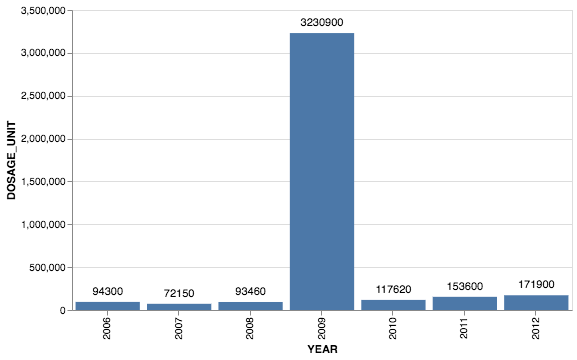

In [3]:
healthdirect_annual = healthdirect[["YEAR", "DOSAGE_UNIT"]].groupby("YEAR").sum().reset_index()

hd_bars = alt.Chart(healthdirect_annual).mark_bar().encode(
    x="YEAR:O",
    y="DOSAGE_UNIT:Q"
).properties(
    width=500
)

hd_text = hd_bars.mark_text(
    align='center',
    baseline='middle',
    dy=-10
).encode(
    text='DOSAGE_UNIT:Q'
)

hd_bars + hd_text

Let's take a quick look at the details of those purchases.

In [4]:
healthdirect[[
    "REPORTER_BUS_ACT","REPORTER_NAME","REPORTER_ADDL_CO_INFO","REPORTER_STATE",
    "BUYER_NAME","DOSAGE_UNIT","BUYER_CITY","BUYER_STATE","QUANTITY",
    "DRUG_NAME","Product_Name","Combined_Labeler_Name","Revised_Company_Name",
    "TRANSACTION_DATE"
]].sort_values("DOSAGE_UNIT", ascending=False).head()

,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_STATE,BUYER_NAME,DOSAGE_UNIT,BUYER_CITY,BUYER_STATE,QUANTITY,DRUG_NAME,Product_Name,Combined_Labeler_Name,Revised_Company_Name,TRANSACTION_DATE
174350,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,NY,"HEALTHDIRECT INSTITUTIONAL PHARMACY SERVICES, ...","3,115,000.00",WILLISTON,VT,"6,230.00",HYDROCODONE,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,"Actavis Pharma, Inc.","Allergan, Inc.",2009-05-08
280552,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,NY,"HEALTHDIRECT INSTITUTIONAL PHARMACY SERVICES, ...","2,500.00",WILLISTON,VT,5.00,HYDROCODONE,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,"Actavis Pharma, Inc.","Allergan, Inc.",2009-10-08
104571,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,NY,"HEALTHDIRECT INSTITUTIONAL PHARMACY SERVICES, ...","2,500.00",WILLISTON,VT,5.00,HYDROCODONE,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,"Actavis Pharma, Inc.","Allergan, Inc.",2011-07-21
81670,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,NY,"HEALTHDIRECT INSTITUTIONAL PHARMACY SERVICES, ...","2,000.00",WILLISTON,VT,4.00,HYDROCODONE,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,"Actavis Pharma, Inc.","Allergan, Inc.",2006-06-08
274600,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,NY,"HEALTHDIRECT INSTITUTIONAL PHARMACY SERVICES, ...","2,000.00",WILLISTON,VT,4.00,HYDROCODONE,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,"Actavis Pharma, Inc.","Allergan, Inc.",2011-08-18


Interesting. Now let's take a look at the rest of our Vermont data. For now, we just want the top-line numbers — excluding HealthDirect, how many pills were sold into the state between 2006 and 2012?

In [5]:
arcosvt["DOSAGE_UNIT"].sum()

119480773.0

What types of purchasers are in this dataset, and how many pills were they purchasing?

In [6]:
arcosvt[[
    "BUYER_BUS_ACT","DOSAGE_UNIT"
]].groupby("BUYER_BUS_ACT").sum().reset_index().sort_values("DOSAGE_UNIT", ascending=False)

,BUYER_BUS_ACT,DOSAGE_UNIT
0,CHAIN PHARMACY,"79,928,180.00"
5,RETAIL PHARMACY,"39,083,788.00"
2,PRACTITIONER-DW/100,"248,200.00"
1,PRACTITIONER,"146,615.00"
4,PRACTITIONER-DW/30,"73,900.00"
3,PRACTITIONER-DW/275,90.00


Who are those purchasers? (Optional: in cases where the `to_csv` line is commented out, just uncomment it to export a csv file with the full dataframe)

In [8]:
buyers = arcosvt
buyers["DOSAGE_UNIT"].sum()
buyers = buyers[[
    "BUYER_NAME","BUYER_CITY","DOSAGE_UNIT"
]].groupby(["BUYER_NAME","BUYER_CITY"]).sum().reset_index().sort_values("DOSAGE_UNIT",ascending=False)

# buyers.to_csv("output/arcos-vt-buyers.csv",index=False)
buyers.head(10)

,BUYER_NAME,BUYER_CITY,DOSAGE_UNIT
225,UNIVERSITY OF VERMONT MEDICAL CENTER,BURLINGTON,"3,380,660.00"
87,"KPH HEALTHCARE SERVICES, INC.",ST ALBANS,"2,784,600.00"
70,"KPH HEALTHCARE SERVICES, INC.",BARRE,"2,752,830.00"
81,"KPH HEALTHCARE SERVICES, INC.",MORRISVILLE,"2,693,360.00"
211,SPRINGFIELD PHARMACY INC,SPRINGFIELD,"2,355,790.00"
224,UNITED DRUG STORES INC,SWANTON,"2,337,960.00"
220,THE PHARMACY INC,BENNINGTON,"2,258,330.00"
139,"MAXI GREEN, INC.",SPRINGFIELD,"2,136,060.00"
140,"MAXI GREEN, INC.",ST. ALBANS,"2,073,000.00"
80,"KPH HEALTHCARE SERVICES, INC.",MILTON,"2,027,990.00"


What types of reporters (distributors and manufacturers) are in this dataset, and how many pills did they sell?

In [9]:
arcosvt[["REPORTER_BUS_ACT","DOSAGE_UNIT"]].groupby("REPORTER_BUS_ACT").sum().reset_index()

,REPORTER_BUS_ACT,DOSAGE_UNIT
0,DISTRIBUTOR,"119,466,805.00"
1,MANUFACTURER,"13,830.00"
2,REVERSE DISTRIB,138.00


Who were the top distributors and manufacturers?

In [10]:
reporters = arcosvt[[
    "REPORTER_BUS_ACT","Reporter_family","DOSAGE_UNIT"
]].groupby(["REPORTER_BUS_ACT","Reporter_family"]).sum().reset_index().sort_values(
    "DOSAGE_UNIT", ascending=False
)

# reporters.to_csv("output/arcos-vt-reporters.csv",index=False)
reporters.head()

,REPORTER_BUS_ACT,Reporter_family,DOSAGE_UNIT
32,DISTRIBUTOR,McKesson Corporation,"40,000,100.00"
13,DISTRIBUTOR,Cardinal Health,"22,729,120.00"
10,DISTRIBUTOR,Burlington Drug Company,"15,119,800.00"
29,DISTRIBUTOR,"KPH Healthcare Services, Inc.","9,233,600.00"
20,DISTRIBUTOR,Eckerd Corporation,"7,034,930.00"


Who manufactured the oxycodone/hydrocodone pills sold during those years? (Optional: uncomment the `to_csv` line to export a csv file with the full totals)

In [11]:
manufacturers = arcosvt[[
    "Combined_Labeler_Name","DOSAGE_UNIT"
]].groupby("Combined_Labeler_Name").sum().reset_index().sort_values(
    "DOSAGE_UNIT", ascending=False
)

# manufacturers.to_csv("output/arcos-vt-manufacturers.csv", index=False)
manufacturers.head()

,Combined_Labeler_Name,DOSAGE_UNIT
33,SpecGx LLC,"48,974,100.00"
3,"Actavis Pharma, Inc.","28,232,978.00"
29,Par Pharmaceutical,"21,272,590.00"
32,Purdue Pharma LP,"6,045,380.00"
8,Amneal Pharmaceuticals LLC,"4,995,920.00"


What companies own the top pill manufacturers selling pills into Vermont? (This is useful in cases where the labeler is a subsidiary and/or was acquired by another company)

In [12]:
arcosvt[[
    "Revised_Company_Name","DOSAGE_UNIT"
]].groupby("Revised_Company_Name").sum().reset_index().sort_values(
    "DOSAGE_UNIT", ascending=False
).head()

,Revised_Company_Name,DOSAGE_UNIT
24,Mallinckrodt,"48,974,100.00"
4,"Allergan, Inc.","27,851,478.00"
17,"Endo Pharmaceuticals, Inc.","21,745,590.00"
29,Purdue Pharma LP,"6,434,680.00"
8,"Amneal Pharmaceuticals, Inc.","4,996,320.00"


Let's zoom out a bit. Statewide, what do total pill sales look like?

In [13]:
arcosvt_annual = arcosvt[["YEAR","DOSAGE_UNIT"]].groupby("YEAR").sum().reset_index()

# arcosvt_annual.to_csv("output/arcos-vt-annual.csv",index=False)
arcosvt_annual

,YEAR,DOSAGE_UNIT
0,2006,"14,625,240.00"
1,2007,"16,421,740.00"
2,2008,"17,012,940.00"
3,2009,"17,552,265.00"
4,2010,"17,919,788.00"
5,2011,"18,230,230.00"
6,2012,"17,718,570.00"


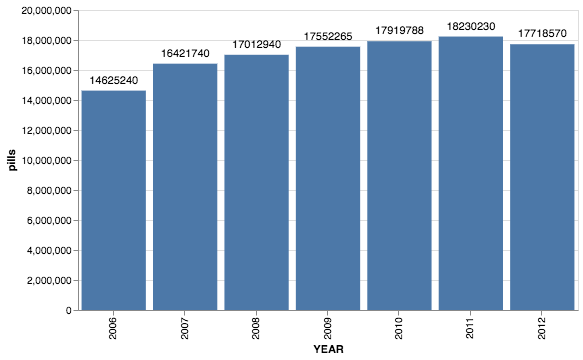

In [14]:
bars = alt.Chart(arcosvt_annual).mark_bar().encode(
    x="YEAR:O",
    y=alt.Y("DOSAGE_UNIT",axis=alt.Axis(title='pills'))
).properties(
    width=500
)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-10
).encode(
    text='DOSAGE_UNIT:Q'
)

bars + text

## County-level data

What does this data look like if we go to a slightly more granular level? Let's pull in U.S. Census Bureau population estimates for those years so we can get a population-adjusted rate of `pills/year/person` — that way Chittenden County doesn't steamroll everything else.

In [24]:
countypop = pd.read_csv("raw_data/countypop-2000-2018.csv",thousands=',')
countypop["County"] = countypop["County"].str.upper().str.replace(" COUNTY","")
countypop = countypop.melt(id_vars=["County"],var_name="year", value_name="pop")

arcosvt_annual_county = arcosvt[["YEAR","BUYER_COUNTY","DOSAGE_UNIT"]].groupby(["BUYER_COUNTY","YEAR"]).sum().reset_index()

arcosvt_annual_county["YEAR"] = arcosvt_annual_county["YEAR"].astype("str")
arcosvt_annual_county = arcosvt_annual_county.merge(
    countypop, left_on=["BUYER_COUNTY","YEAR"], right_on=["County","year"], how="left"
)
arcosvt_annual_county=arcosvt_annual_county[["BUYER_COUNTY","YEAR","DOSAGE_UNIT","pop"]]
arcosvt_annual_county["rate"] = arcosvt_annual_county["DOSAGE_UNIT"]/arcosvt_annual_county["pop"]
# arcosvt_annual_county.to_csv("output/arcos-county-rates.csv", index=False)
arcosvt_annual_county.head()

,BUYER_COUNTY,YEAR,DOSAGE_UNIT,pop,rate
0,ADDISON,2006,"767,400.00",36758,20.88
1,ADDISON,2007,"844,900.00",36886,22.91
2,ADDISON,2008,"856,050.00",36905,23.20
3,ADDISON,2009,"915,270.00",36847,24.84
4,ADDISON,2010,"868,380.00",36826,23.58


Just for kicks, let's look at what those totals show before we adjust them for population.

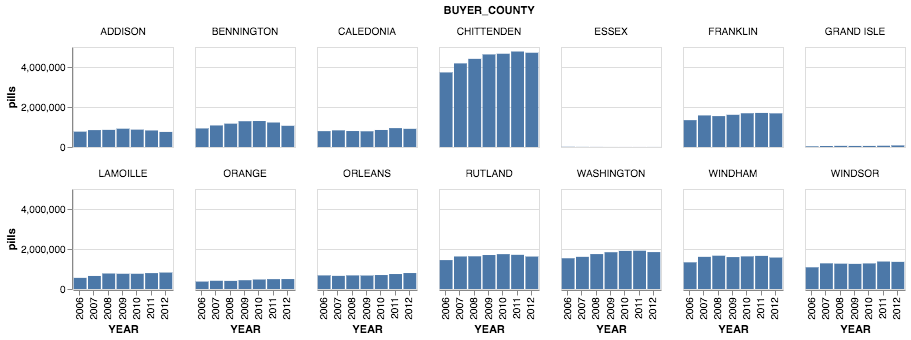

In [25]:
county_facet = alt.Chart(arcosvt_annual_county).mark_bar().encode(
    x="YEAR:O",
    y=alt.Y("DOSAGE_UNIT",axis=alt.Axis(title='pills')),
    facet="BUYER_COUNTY:N",
).properties(
    width=100,
    height=100,
    columns=7,
)

county_facet

Now let's look at pills per person for each county.

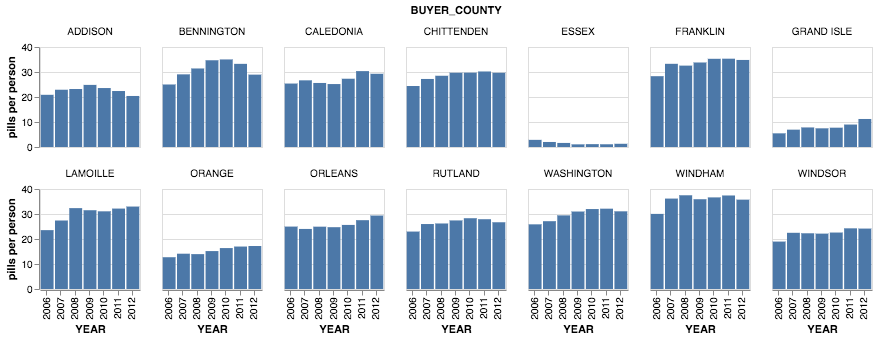

In [26]:
county_rate_facet = alt.Chart(arcosvt_annual_county).mark_bar().encode(
    x="YEAR:O",
    y=alt.Y("rate",axis=alt.Axis(title='pills per person')),
    facet="BUYER_COUNTY:N",
#     color=alt.Color("BUYER_COUNTY:N", legend=None),
    tooltip=["YEAR","DOSAGE_UNIT","rate"]
).properties(
    width=100,
    height=100,
    columns=7,
)

county_rate_facet

We're already seeing that Essex and Grand Isle are extremely low. One of the things to note about this dataset is that it reflects where the pharmacies and doctor's offices are located, not that the people in those counties were not filling prescriptions for opioids. In very low-population counties, folks are likely heading elsewhere to fill prescriptions. For example, there were no pharmacies ordering opioids in Essex County in this dataset — just a health center and a veterinarian's office.

In [27]:
arcosvt[arcosvt["BUYER_COUNTY"]=="ESSEX"]["BUYER_ADDL_CO_INFO"].unique()

array(['ISLAND POND HEALTH CENTER', 'EAST HAVEN VETERINARY SERVICE'],
      dtype=object)

Similarly, in Grand Isle County, there's just one buyer — a pharmacy — but since the islands are very close to Franklin and Chittenden County, people are likely heading to doctors and pharmacies outside of their county.

In [28]:
arcosvt[arcosvt["BUYER_COUNTY"]=="GRAND ISLE"]["BUYER_ADDRESS1"].unique()

array(["DBA MCGREGOR'S SOUTH HERO PHCY"], dtype=object)

Let's create one more county summary showing average annual pills purchased and average annual rate (pills per person).

In [29]:
arcosvt_county_rate = arcosvt_annual_county[[
    "BUYER_COUNTY","DOSAGE_UNIT","rate"
]].groupby("BUYER_COUNTY").mean().reset_index()
arcosvt_county_rate.sort_values("rate",ascending=False)

,BUYER_COUNTY,DOSAGE_UNIT,rate
12,WINDHAM,"1,580,011.43",35.63
5,FRANKLIN,"1,592,529.29",33.34
1,BENNINGTON,"1,149,341.43",31.06
7,LAMOILLE,"732,095.71",30.14
11,WASHINGTON,"1,770,604.29",29.80
3,CHITTENDEN,"4,442,314.00",28.50
2,CALEDONIA,"844,792.86",27.11
10,RUTLAND,"1,639,995.71",26.50
9,ORLEANS,"704,858.57",25.88
0,ADDISON,"833,248.57",22.60


## Statewide rates

OK, let's zoom out again and get a statewide annual rate - pills per Vermonter per year.

In [30]:
arcosvt_annual_rate = arcosvt_annual_county[["YEAR","DOSAGE_UNIT","pop"]].groupby("YEAR").sum().reset_index()
arcosvt_annual_rate["rate"] = arcosvt_annual_rate["DOSAGE_UNIT"]/arcosvt_annual_rate["pop"]

arcosvt_annual_rate

,YEAR,DOSAGE_UNIT,pop,rate
0,2006,"14,625,240.00",622892,23.48
1,2007,"16,421,740.00",623481,26.34
2,2008,"17,012,940.00",624151,27.26
3,2009,"17,552,265.00",624817,28.09
4,2010,"17,919,788.00",625880,28.63
5,2011,"18,230,230.00",626979,29.08
6,2012,"17,718,570.00",626063,28.30


What's the annual average pills per person sold into Vermont?

In [31]:
arcosvt_annual_rate["rate"].mean()

27.311025609245398

How about the total pills per person over all seven years?

In [32]:
arcosvt_annual_rate["rate"].sum()

191.17717926471778

And that's a wrap. This is a top-level analysis, and we'll be digging deeper into the numbers in the coming days and weeks. Got any questions about this analysis? Found something interesting that's not in here? Drop me a line at [andrea@sevendaysvt.com](mailto:andrea@sevendaysvt.com)!